In [45]:
install.packages('redres')

Warning message:
“package ‘redres’ is not available (for R version 4.0.1)”


In [31]:
library(lme4)
library(car)
library(lmerTest)
library(tidyverse)
library(ragg)
library(HLMdiag)
library(VCA)


Attaching package: ‘VCA’


The following objects are masked from ‘package:lme4’:

    fixef, getL, ranef




# Forced-choice survey LMER

In [3]:
df = read_csv("../clean_data/forced_choice_emotion_uw_students_long_format_lmer.csv")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  participantId = col_double(),
  photoId = col_character(),
  emotion = col_character(),
  ethnicity = col_character(),
  sex = col_character(),
  age = col_character(),
  label = col_character(),
  url = col_character(),
  sentimentScore = col_double(),
  sexC = col_double(),
  ageC = col_double(),
  ethnicityC = col_double()
)




In [4]:
head(df)

participantId,photoId,emotion,ethnicity,sex,age,label,url,sentimentScore,sexC,ageC,ethnicityC
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,Q2.1,Neutral,bipoc,female,adult,anger,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_bJXdODAZHOaG0rI,0.0000,-0.5,0.5,-0.5
0,Q163.1,Happiness,white,male,child,happiness,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_eWnGys8SLE5J3Cu,0.5574,0.5,-0.5,0.5
0,Q77.1,Disgust,bipoc,male,adult,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_1Zx26VAbwv9uFFQ,-0.5994,0.5,0.5,-0.5
0,Q78.1,Disgust,bipoc,male,child,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_bjzYq2UEKkXH7aC,-0.5994,0.5,-0.5,-0.5
0,Q162.1,Happiness,white,male,adult,happiness,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_3NR7AkPxBUkdOQe,0.5574,0.5,0.5,0.5
0,Q79.1,Uncertain,white,female,adult,disgust,https://uwmadison.co1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_5hkOSrFORUoHopM,-0.2960,-0.5,0.5,0.5


## Maximal random effects structure

In [12]:
# control=lmerControl(optimizer ="Nelder_Mead", calc.derivs=FALSE,optCtrl=list(maxfun=2e6),check.nobs.vs.nRE = "ignore")
# m1<-lmer(
#     sentimentScore ~ 1 + sexC*ethnicityC + (1 + sexC*ethnicityC|participantId) + (1 | photoId), 
#     data = df,
#     control=control)
# summary(m1)

Warning message:
“Model failed to converge with 1 negative eigenvalue: -2.5e+02”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sentimentScore ~ 1 + sexC * ethnicityC + (1 + sexC * ethnicityC |  
    participantId) + (1 | photoId)
   Data: df
Control: control

REML criterion at convergence: 2097.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2085 -0.4885  0.0136  0.4524  4.5735 

Random effects:
 Groups        Name            Variance Std.Dev. Corr             
 photoId       (Intercept)     0.100257 0.31663                   
 participantId (Intercept)     0.002509 0.05008                   
               sexC            0.001080 0.03286   0.86            
               ethnicityC      0.004775 0.06910   0.74  0.98      
               sexC:ethnicityC 0.006651 0.08155  -0.37 -0.39 -0.36
 Residual                      0.065148 0.25524                   
Number of obs: 9792, groups:  photoId, 192; participantId, 51

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    


In [20]:
# MAXIMAL MODEL doesn't converge at all / tried multiple optimizers 

## Simplified random effects structure

In [5]:
control=lmerControl(optimizer ="Nelder_Mead", calc.derivs=FALSE,optCtrl=list(maxfun=2e6),check.nobs.vs.nRE = "ignore")
m2<-lmer(
    sentimentScore ~ 1 + sexC*ethnicityC + (1 + sexC*ethnicityC|participantId), 
    data = df,
    control=control)
summary(m2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sentimentScore ~ 1 + sexC * ethnicityC + (1 + sexC * ethnicityC |  
    participantId)
   Data: df
Control: control

REML criterion at convergence: 10454.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2736 -0.9325  0.1982  0.9006  1.7670 

Random effects:
 Groups        Name            Variance  Std.Dev.  Corr             
 participantId (Intercept)     5.286e-04 0.0229903                  
               sexC            1.208e-06 0.0010989 -1.00            
               ethnicityC      7.772e-07 0.0008816 -1.00  1.00      
               sexC:ethnicityC 4.208e-06 0.0020512  1.00 -1.00 -1.00
 Residual                      1.694e-01 0.4115993                  
Number of obs: 9792, groups:  participantId, 51

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       -0.11533    0.00526   50.04370 -21.926  < 2e-16 ***
sexC        

In [5]:
# Anova(m2,type=3,t="F")  
# ------------------- 
# it won't coverge

In [21]:
## Type III anova table with p-values for F-tests based on Satterthwaite's
## method:
(aov <- anova(m2))

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
sexC,0.6276386,0.6276386,1,8285.678,3.704763,0.0542915705
ethnicityC,2.0175219,2.0175219,1,8763.875,11.908829,0.0005613194
sexC:ethnicityC,1.0217626,1.0217626,1,8386.140,6.031160,0.0140756338


## Model interpretation

In [22]:
# sex-photo effect:
# The effect of sex-photo on sentiment-score was not significant, b = -0.01602, F(1,51) = 3.7, p = 0.054
# Averaging across POC and Caucasian photo-faces, and controlling for ethnicity and the ethnicity-photo by sex-photo interaction,
# sentiment-scores were -0.016 more negative in response to male faces than female faces. 

In [23]:
# ethnicity-photo effect:
# The effect of ethnicity-photo on sentiment-scores was significant, b =  0.028, F(1,51) = 11.9, p < .001.
# For sake of completeness:
# Averaging across female and male photos, and controlling for sex-photo and the sex-photo by ethnicity-photo interaction,
# sentiment-scores were 0.028 more positive in response to caucasian-photos than poc-photos

In [24]:
# Face by odor interaction:
# The face by odor interaction was significant, b = 0.04, F(1,51) = 6.03, p = 0.014.
# For sake of completeness:
# Controlling for lower-order effects, the difference in sentiment-scorees between the two sex-photo conditions 
# was 0.04 points greater in the caucasian-photos than in the poc-photos

## Indiviual subject data points

In [7]:
p = ggplot(df,aes(sex,sentimentScore,color=ethnicity,group=ethnicity))+
    geom_point()+
    geom_smooth(method="lm",se=F)+
    facet_wrap(~participantId)+
    theme_bw()

# pngfile <- fs::path(knitr::fig_path(),  "resolution.png")
# agg_png(pngfile, width = 7087, height = 4252, units = "px", res = 900)
# plot(p)
# invisible(dev.off())
# knitr::include_graphics(pngfile)

In [13]:
pngfile <- fs::path(knitr::fig_path(),  "scaling.png")
agg_png(pngfile, width = 60, height = 60, units = "cm", res = 300, scaling = 2.5)
plot(p)
invisible(dev.off())
knitr::include_graphics(pngfile)

`geom_smooth()` using formula 'y ~ x'



[1] "figure/-1/scaling.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

![image](figure/-1/scaling.png)

## Testing model assumptions

### Linearity

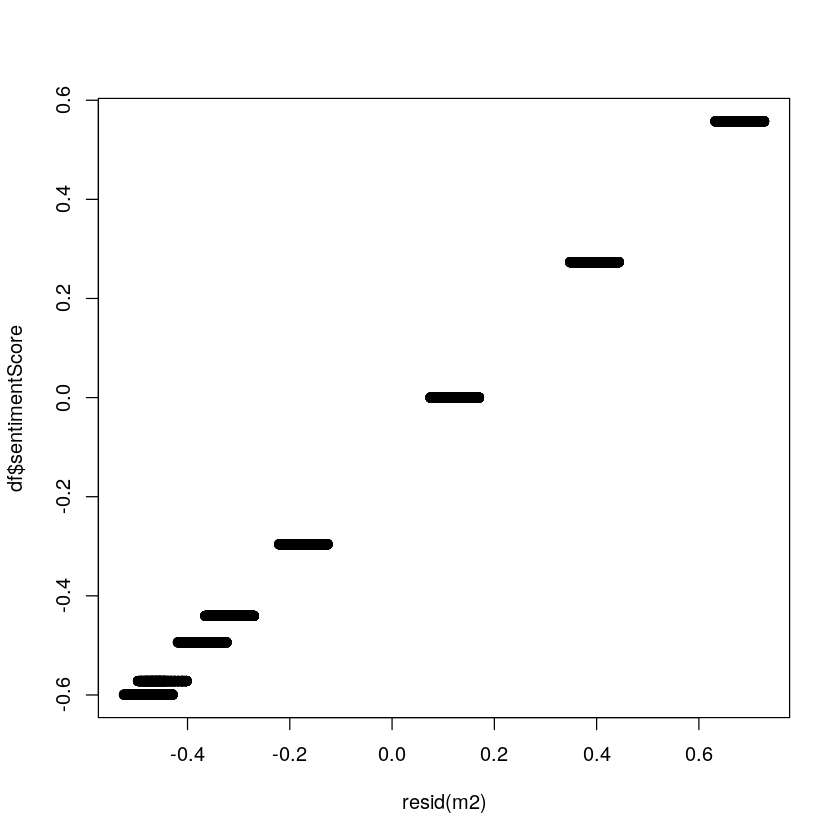

In [49]:
Plot.Model.F.Linearity<-plot(resid(m2),df$sentimentScore)

### Homogeneity of Variance

In [ ]:
# ANOVA of the between subjects residuals.
# the assumption is that the variance is not going to differ, we would hope to see 
# NO STATISTICAL DIFFERENCES in the following procedure (i.e. p>0.05)

In [52]:
df$Model.F.Res<- residuals(m2) #extracts the residuals and places them in a new column in our original data table
df$Abs.Model.F.Res <-abs(df$Model.F.Res) #creates a new column with the absolute value of the residuals
df$Model.F.Res2 <- df$Abs.Model.F.Res^2 #squares the absolute values of the residuals to provide the more robust estimate
Levene.Model.F <- lm(Model.F.Res2 ~ participantId, data=df) #ANOVA of the squared residuals
anova(Levene.Model.F) #displays the results

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
participantId,1,8.550194e-04,0.0008550194,0.04111845,0.8393137
Residuals,9790,2.035738e+02,0.0207940576,NA,NA


In [53]:
# Since the p value is greater than 0.05, we can say that the variance of the residuals is equal and 
# therefore the assumption of #homoscedasticity is met 

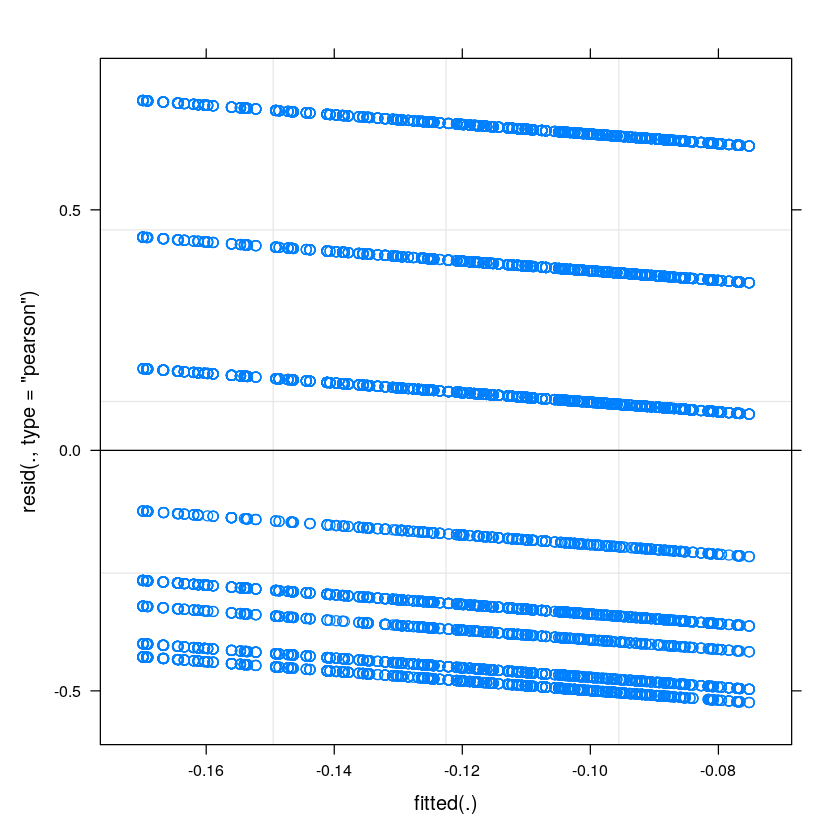

In [54]:
Plot.Model.F <- plot(m2) #creates a fitted vs residual plot
Plot.Model.F

In [ ]:
library(ggplot2)
ggplot(data = resid1_fm1, aes(x = standLRT, y = .std.ls.resid)) + 
  geom_point(alpha = 0.2) +
  geom_smooth(method = "loess", se = FALSE) + 
  labs(y = "LS level-1 residuals", 
       title = "LS residuals against standardized LRT score")

### The residuals of the model are normally distributed

In [55]:
require("lattice")

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”


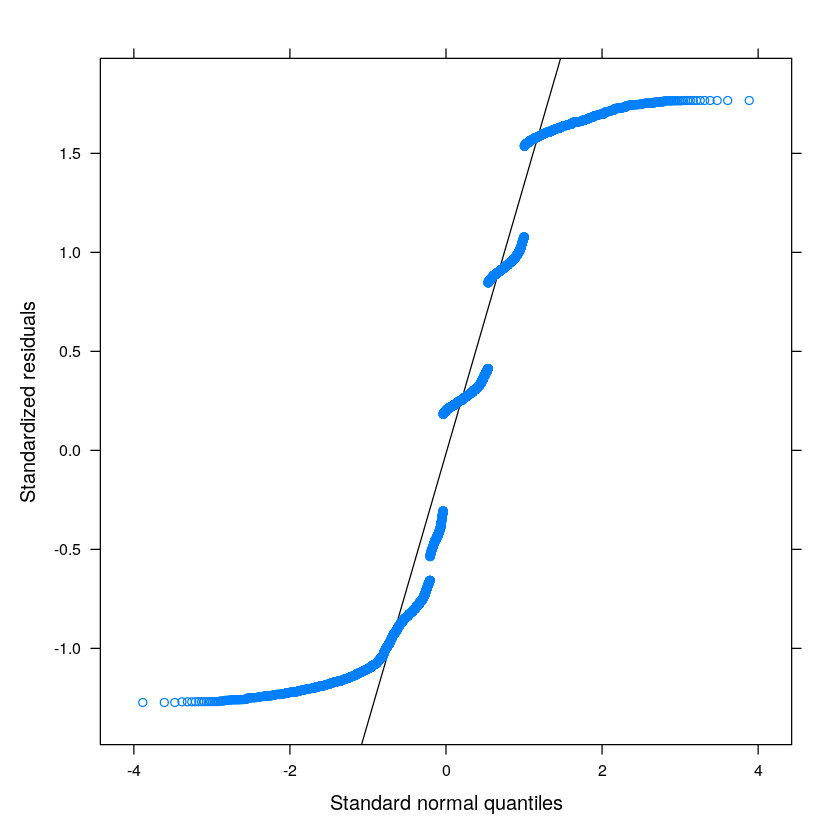

In [56]:
qqmath(m2, id=0.05) #id: identifies values that may be exerting undue influence on the model (i.e. outliers)

In [57]:
# looks not normal....try with transformations
# https://ademos.people.uic.edu/Chapter18.html

## Influence

In [64]:
resid2<-hlm_resid(object=m2,level="participantId")

In [65]:
cooksd <- cooks.distance(m2, level = "participantId")
varPlot(cooksd, IDs=rownames(resid2))

ERROR: Error in is.data.frame(Data): argument "Data" is missing, with no default


In [66]:
resid2

participantId,.ranef.intercept,.ranef.sex_c,.ranef.ethnicity_c,.ranef.sex_c_ethnicity_c,.ls.intercept,.ls.sex_c,.ls.ethnicity_c,.ls.sex_c_ethnicity_c
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.0221389603,-1.058216e-03,-8.488879e-04,1.974949e-03,0.058970364,0.0316919526,-0.057479943,-0.002403676
1,-0.0136692126,6.533721e-04,5.241254e-04,-1.219383e-03,-0.037076511,-0.0113476307,-0.011884109,0.057204657
2,0.0036407475,-1.740234e-04,-1.396006e-04,3.247874e-04,0.008290155,-0.0519747141,-0.041790359,0.073887990
3,0.0120841870,-5.776098e-04,-4.633540e-04,1.077996e-03,0.030310989,-0.0720413807,-0.099375776,0.026950490
4,0.0097552639,-4.662900e-04,-3.740517e-04,8.702382e-04,0.025938072,0.0030690359,-0.011569526,0.007583824
5,-0.0169057516,8.080748e-04,6.482254e-04,-1.508126e-03,-0.043633282,0.0738117443,-0.021897651,-0.151893260
6,-0.0192771477,9.214248e-04,7.391528e-04,-1.719645e-03,-0.051977553,0.0309211193,-0.027348693,0.107442157
7,0.0012154310,-5.809616e-05,-4.660347e-05,1.084129e-04,0.003816718,-0.0180257557,0.011027349,-0.122001593
8,0.0223074687,-1.066271e-03,-8.553455e-04,1.989977e-03,0.059671405,-0.0487309641,0.041465891,-0.049670343
